<a href="https://colab.research.google.com/github/kimyouchan202000859/python/blob/main/CNN_1%EB%B2%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

fashion_mnist = tf.keras.datasets.fashion_mnist

#자료 불러오기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(type(X_train)) #타입
print(X_train.shape)  #크기

<class 'numpy.ndarray'>
(60000, 28, 28, 1)


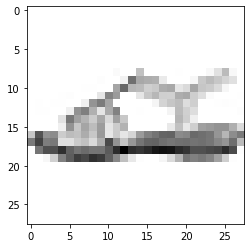

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  9  0  0  90 0  0  0  0  1  0  0  0  14 52 97 13 0  
0  0  0  0  0  0  0  0  0  3  0  0  26 16211210810640 0  0  0  17 81 97 84 69 53 0  
0  0  0  0  0  0  0  2  2  0  0  11517010197 75 81 10811246 62 11485 79 61 18 0  0  
0  0  0  0  2  4  0  0  0  45 1431230  0  45 84 10075 73 10811276

In [ ]:
plt.imshow(X_train[257], cmap='Greys')
plt.show()
import sys

for x in X_train[257]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255  #0에서 1사이로 변환
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[254]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) #이미지 불러오기
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=32, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도
print("\n Test Accuracy: %.1f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.32327, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.32327 to 0.27024, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.27024 to 0.26491, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.26491 to 0.23601, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.23601

Epoch 6: val_loss did not improve from 0.23601

Epoch 7: val_loss did not improve from 0.23601

Epoch 8: val_loss did not improve from 0.23601

Epoch 9: val_loss did not improve from 0.23601

Epoch 10: val_loss did not improve from 0.23601
313/313 [==============================] - 6s 19ms/step - loss: 0.2526 - accuracy: 0.9190

 Test Accuracy: 0.9
